### Exploratory data analysis of Stock prices of Tech companies


### importing the required libraries and fetching the stock data from Yahoo Finance


In [4]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import datetime
from datetime import date
%matplotlib inline

We get the stock market information for the below mentioned companies
* Amazon
* Facebook
* Google
* Microsoft
* Twitter
* Apple

Considered the data from the year 2020 start till date


In [5]:
start = datetime.datetime(2020, 1, 1)

end = date.today()

In [ ]:
# Amazon
Amazon = data.DataReader("AMZN", 'yahoo', start, end)

# Facebook
Facebook = data.DataReader("META", 'yahoo', start, end)

# Google
Google = data.DataReader("GOOG", 'yahoo', start, end)

# Microsoft
Microsoft = data.DataReader("MSFT", 'yahoo', start, end)

# Twitter
Twitter = data.DataReader("TWTR", 'yahoo', start, end)

# Apple
Apple = data.DataReader("AAPL", 'yahoo', start, end)

In [226]:
Amazon.reset_index(inplace=True)
Amazon["Date"].value_counts()
Facebook.reset_index(inplace=True)
Facebook["Date"].value_counts()
Google.reset_index(inplace=True)
Google["Date"].value_counts()
Microsoft.reset_index(inplace=True)
Microsoft["Date"].value_counts()
Twitter.reset_index(inplace=True)
Twitter["Date"].value_counts()
Apple.reset_index(inplace=True)
Apple["Date"].value_counts()

2020-01-02    1
2021-11-19    1
2021-11-23    1
2021-11-24    1
2021-11-26    1
             ..
2020-12-16    1
2020-12-17    1
2020-12-18    1
2020-12-21    1
2022-11-14    1
Name: Date, Length: 724, dtype: int64

##### Add a Column_Company Name

In [227]:
Amazon["Company"]='Amazon'
Facebook["Company"]='Facebook'
Microsoft["Company"]='Microsoft'
Twitter["Company"]='Twitter'
Apple["Company"]='Apple'
Google["Company"]='Google'

##### Closing prices of Amazon

In [230]:
import plotly.express as px
fig = px.line(Amazon, x="Date", y="Close", title='Closing price for Amazon')
fig.show()

##### Append all the data sets - these six tables

In [231]:

DataSet=pd.concat([Amazon,Facebook,Google,Microsoft,Twitter,Apple],sort=True)
DataSet


,Adj Close,Close,Company,Date,High,Low,Open,Volume
0,94.900497,94.900497,Amazon,2020-01-02,94.900497,93.207497,93.750000,80580000.0
1,93.748497,93.748497,Amazon,2020-01-03,94.309998,93.224998,93.224998,75288000.0
2,95.143997,95.143997,Amazon,2020-01-06,95.184502,93.000000,93.000000,81236000.0
3,95.343002,95.343002,Amazon,2020-01-07,95.694504,94.601997,95.224998,80898000.0
4,94.598503,94.598503,Amazon,2020-01-08,95.550003,94.321999,94.902000,70160000.0
...,...,...,...,...,...,...,...,...
719,139.500000,139.500000,Apple,2022-11-08,141.429993,137.490005,140.410004,89908500.0
720,134.869995,134.869995,Apple,2022-11-09,138.550003,134.589996,138.500000,74917800.0
721,146.869995,146.869995,Apple,2022-11-10,146.869995,139.500000,141.240005,118854000.0
722,149.699997,149.699997,Apple,2022-11-11,150.009995,144.369995,145.820007,93903800.0


#### Derive the average closing price for each company

In [287]:
average_closing_price=DataSet.groupby('Company').Close.mean().to_frame()

average_closing_price.reset_index(inplace=True)
fig = px.bar(average_closing_price, x="Company", y="Close", title='Avg. Closing price')
fig.show()


#### Spread chart using the adj closing price for the company Amazon and Facebook

In [234]:

import cufflinks as cf
cf.go_offline()

In [235]:
Adj_Close_df = pd.DataFrame()
Adj_Close_df["Dates"] = Amazon["Date"]
Adj_Close_df["Amazon"] = Amazon["Adj Close"]
Adj_Close_df["Facebook"] = Facebook["Adj Close"]
Upd_Adj_Close_df = Adj_Close_df.set_index('Dates')
Upd_Adj_Close_df.iplot(kind='spread', xTitle = "Date", yTitle = "Adj. Closing")

C:\Users\karan\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

C:\Users\karan\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



#### Calculate day level returns for each company

In [236]:

returns=pd.DataFrame()
returns=DataSet.groupby('Company').Close.pct_change()
returns

0           NaN
1     -0.012139
2      0.014886
3      0.002092
4     -0.007809
         ...   
719    0.004175
720   -0.033190
721    0.088975
722    0.019269
723   -0.004609
Name: Close, Length: 4332, dtype: float64

In [237]:
DataSet["pct"] = returns
DataSet

,Adj Close,Close,Company,Date,High,Low,Open,Volume,pct
0,94.900497,94.900497,Amazon,2020-01-02,94.900497,93.207497,93.750000,80580000.0,NaN
1,93.748497,93.748497,Amazon,2020-01-03,94.309998,93.224998,93.224998,75288000.0,-0.012139
2,95.143997,95.143997,Amazon,2020-01-06,95.184502,93.000000,93.000000,81236000.0,0.014886
3,95.343002,95.343002,Amazon,2020-01-07,95.694504,94.601997,95.224998,80898000.0,0.002092
4,94.598503,94.598503,Amazon,2020-01-08,95.550003,94.321999,94.902000,70160000.0,-0.007809
...,...,...,...,...,...,...,...,...,...
719,139.500000,139.500000,Apple,2022-11-08,141.429993,137.490005,140.410004,89908500.0,0.004175
720,134.869995,134.869995,Apple,2022-11-09,138.550003,134.589996,138.500000,74917800.0,-0.033190
721,146.869995,146.869995,Apple,2022-11-10,146.869995,139.500000,141.240005,118854000.0,0.088975
722,149.699997,149.699997,Apple,2022-11-11,150.009995,144.369995,145.820007,93903800.0,0.019269


In [238]:

import plotly.express as px

fig = px.line(DataSet, x="Date", y="pct", color='Company')
fig.show()

#### standard deviation of the returns over the entire time period 

In [239]:

std_pct=DataSet.groupby('Company').pct.std().to_frame()
std_pct.reset_index(inplace=True)
print(std_pct)
fig = px.bar(std_pct, x="Company", y="pct", title='Avg. Standard Deviation')
fig.show()

     Company       pct
0     Amazon  0.024776
1      Apple  0.023404
2   Facebook  0.030795
3     Google  0.021712
4  Microsoft  0.022061
5    Twitter  0.035145


#### Density plot to visualize the return for each company in 2020

In [241]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Amazon')].dropna(subset = ["pct"])
x2 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Facebook')].dropna(subset = ["pct"])
x3 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Google')].dropna(subset = ["pct"])
x4 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Apple')].dropna(subset = ["pct"])
x5 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Microsoft')].dropna(subset = ["pct"])
x6 = DataSet.loc[(DataSet['Year'] == '2020') & (DataSet['Company'] == 'Twitter')].dropna(subset = ["pct"])

# Group data together
hist_data = [x1["pct"], x2["pct"], x3["pct"], x4["pct"], x5["pct"], x6["pct"]]
#print(hist_data)
group_labels = ['Amazon','Facebook','Google','Apple','Microsoft','Twitter']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

#### Heatmap of the correlation between the stocks Close Price in each year.


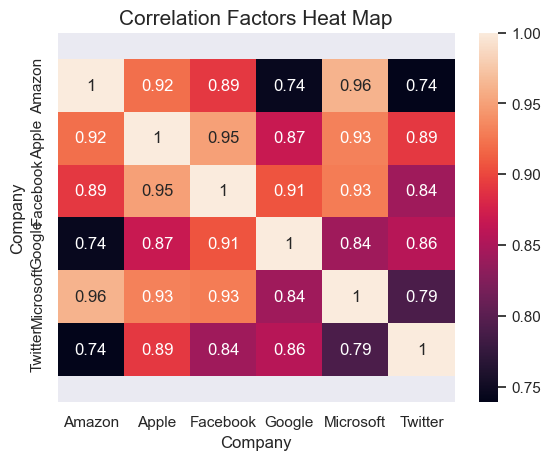

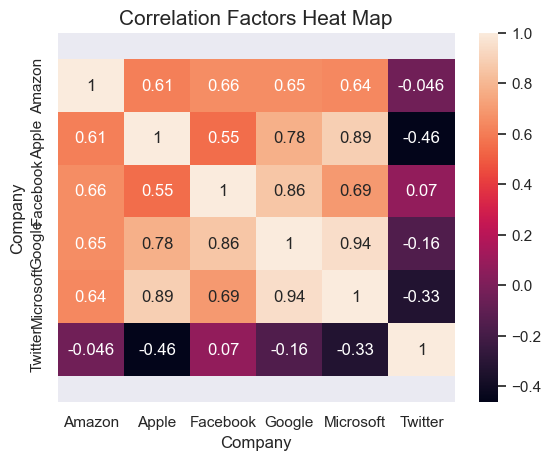

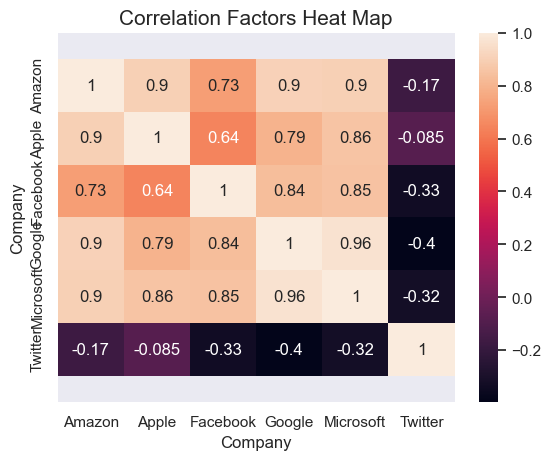

In [260]:
Years = ['2020','2021','2022']
for i in Years:
    DataSet2 = DataSet[DataSet["Year"] == i][['Date', 'Close', 'Company']]
    DataSet2.head()
    df_pivot = DataSet2.pivot('Date','Company','Close').reset_index()
    df_pivot.head()
    sns.heatmap(df_pivot.corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')
    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b, t)
    plt.show()